# Letterbox Movie Classification - Analysis


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilislam007/letterbox-movie-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/letterbox-movie-classification-dataset


In [ ]:
import pandas as pd
import os

dataset_path = path

# Load the dataset into a pandas DataFrame
df = pd.read_csv(os.path.join(dataset_path, "Letterbox Movie Classification Dataset.csv"))



In [ ]:
# Display information about the DataFrame
print("\nDataFrame Info:")
df.info()




DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★       10000 non-null  int64  
 16  Total_

In [ ]:
# Display the first few rows of the DataFrame
print("\nDataFrame Head:")
display(df.head())


DataFrame Head:


,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


# Task
Perform exploratory data analysis (EDA) and visual analysis on the dataset.

## Examining Missing Data

Checking for missing values in the dataset and deciding how to handle them (e.g., imputation, dropping rows/columns).

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Unnamed: 0           0
Film_title           0
Director             0
Average_rating       0
Genres               0
Runtime              0
Original_language    0
Description          0
Studios              0
Watches              0
List_appearances     0
Likes                0
Fans                 0
Lowest★              0
Medium★★★            0
Highest★★★★★         0
Total_ratings        0
dtype: int64


## Analyzing Numerical Variable Distributions

Generate histograms or box plots for numerical variables such as `Average_rating`, `Runtime`, `Watches`, `Likes`, `Fans`, `Total_ratings` to visualize their distributions.

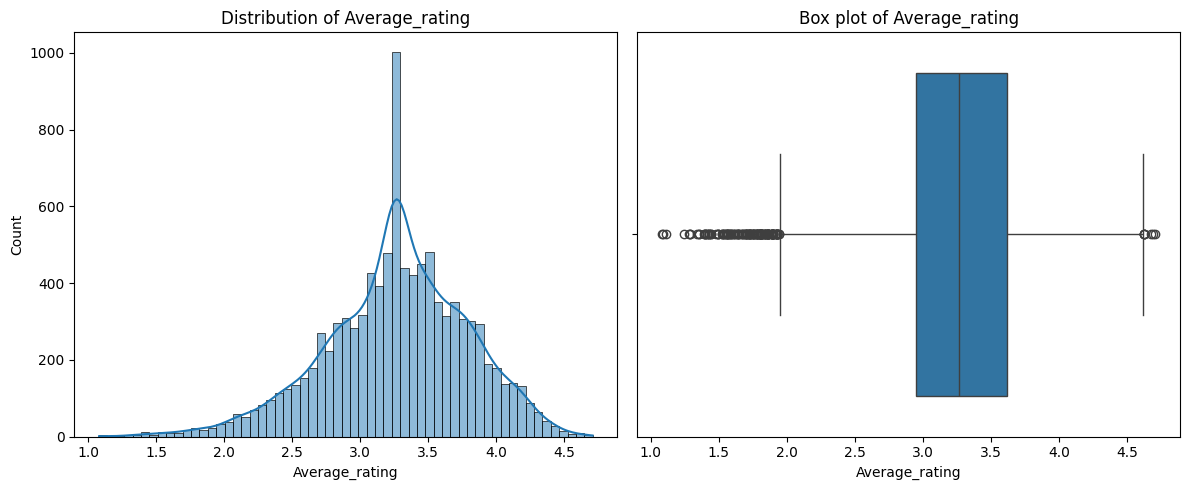

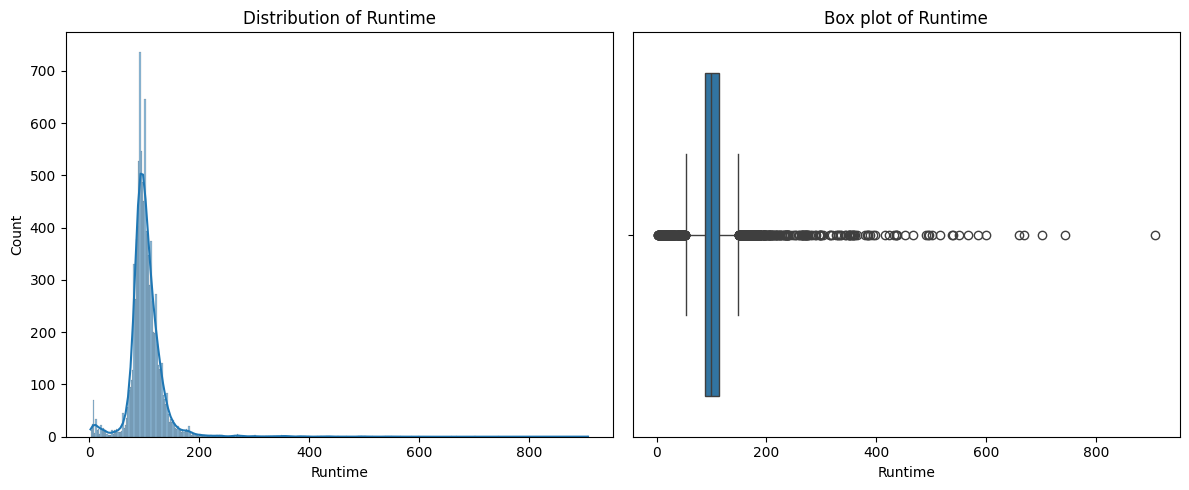

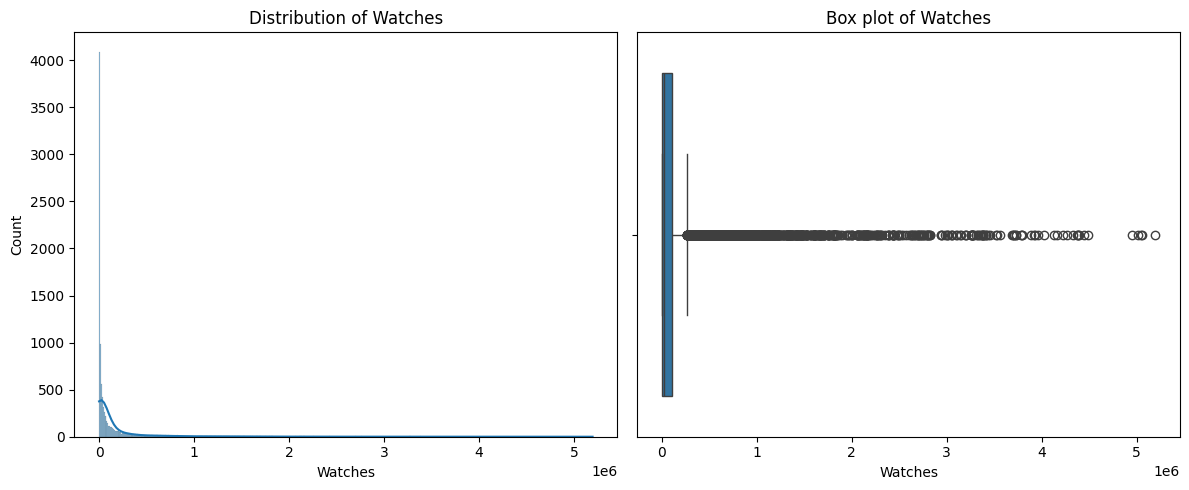

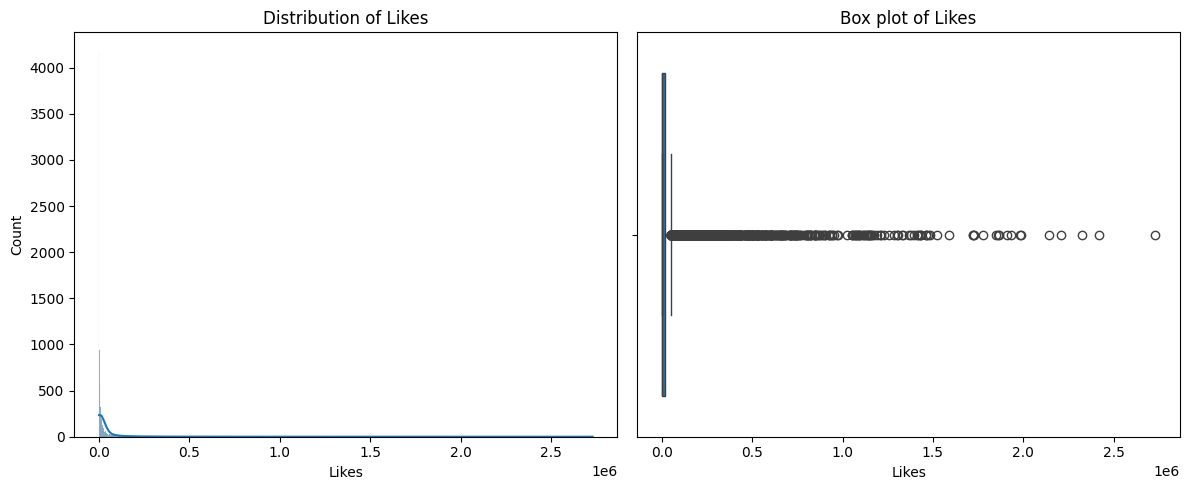

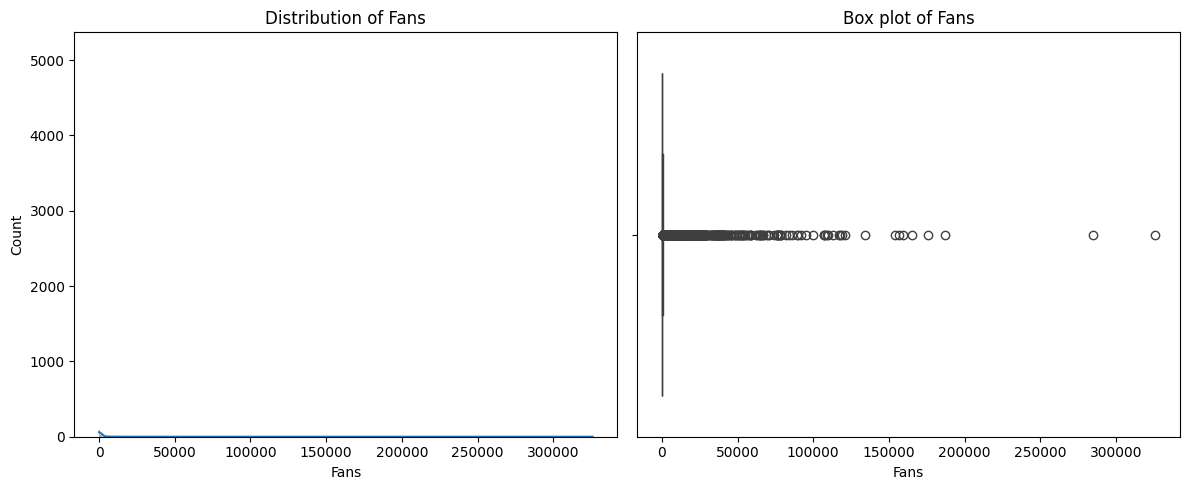

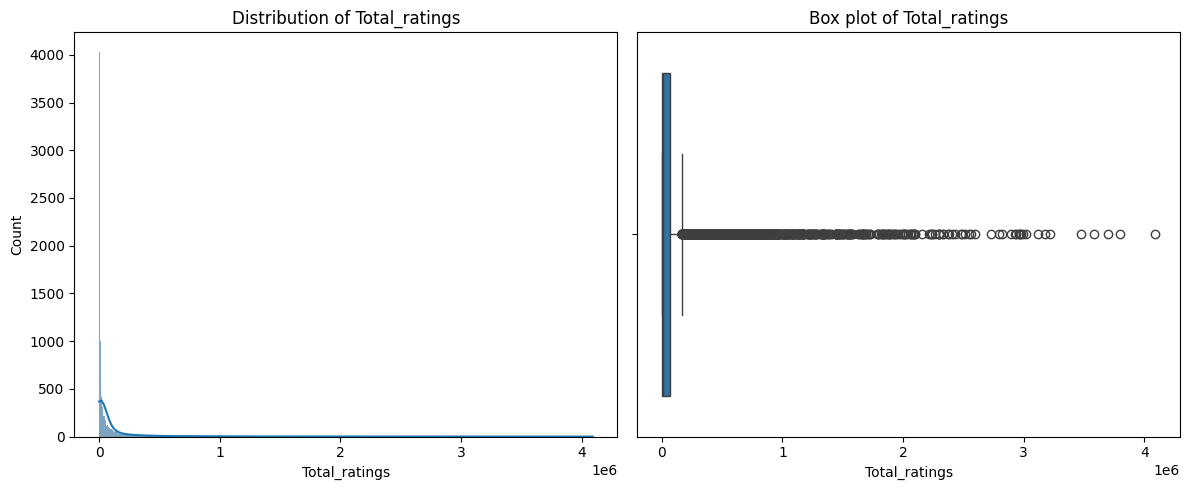

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Average_rating', 'Runtime', 'Watches', 'Likes', 'Fans', 'Total_ratings']

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')

    plt.tight_layout()
    plt.show()

## Analysis of Categorical Variables

Examining the distribution of categorical variables such as Genres, Original_language, Studios, by generating bar charts showing the number of occurrences of individual categories.

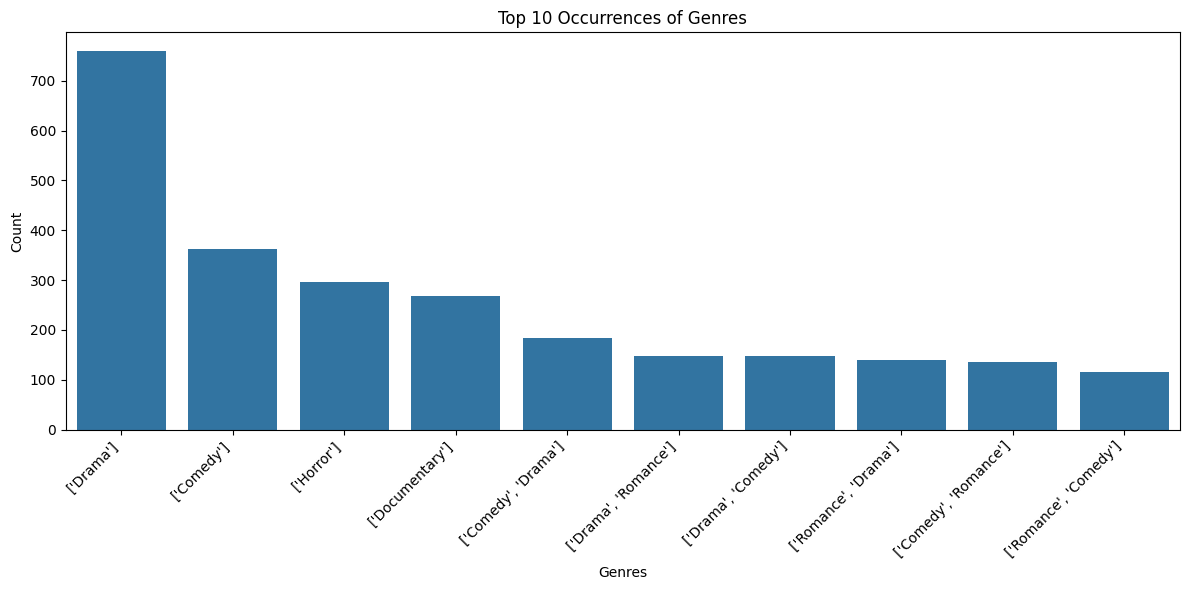

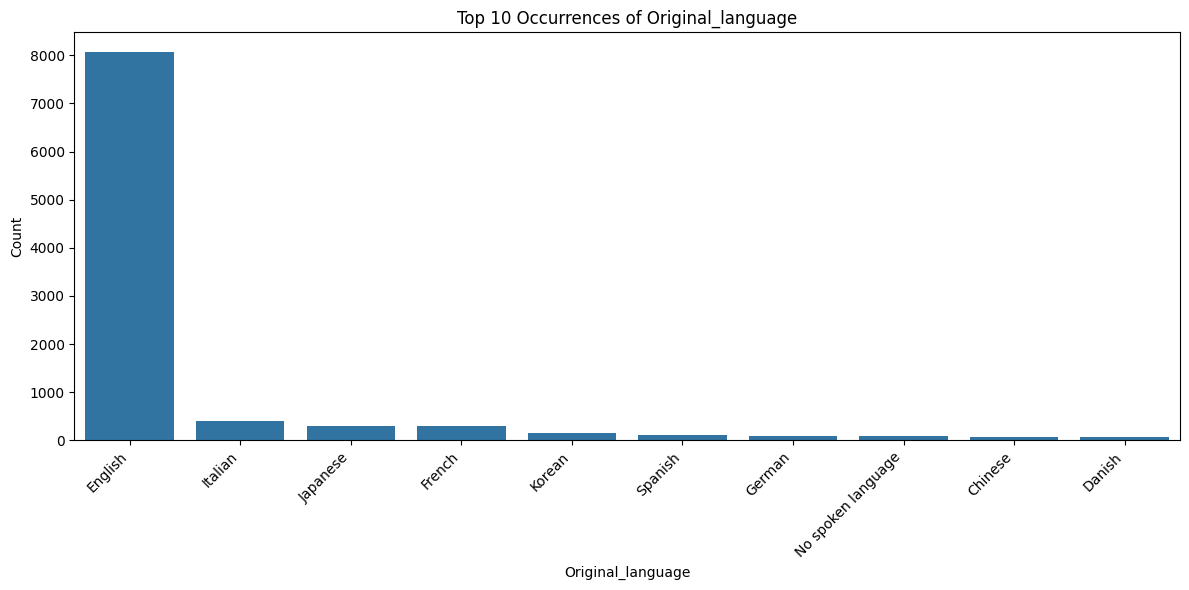

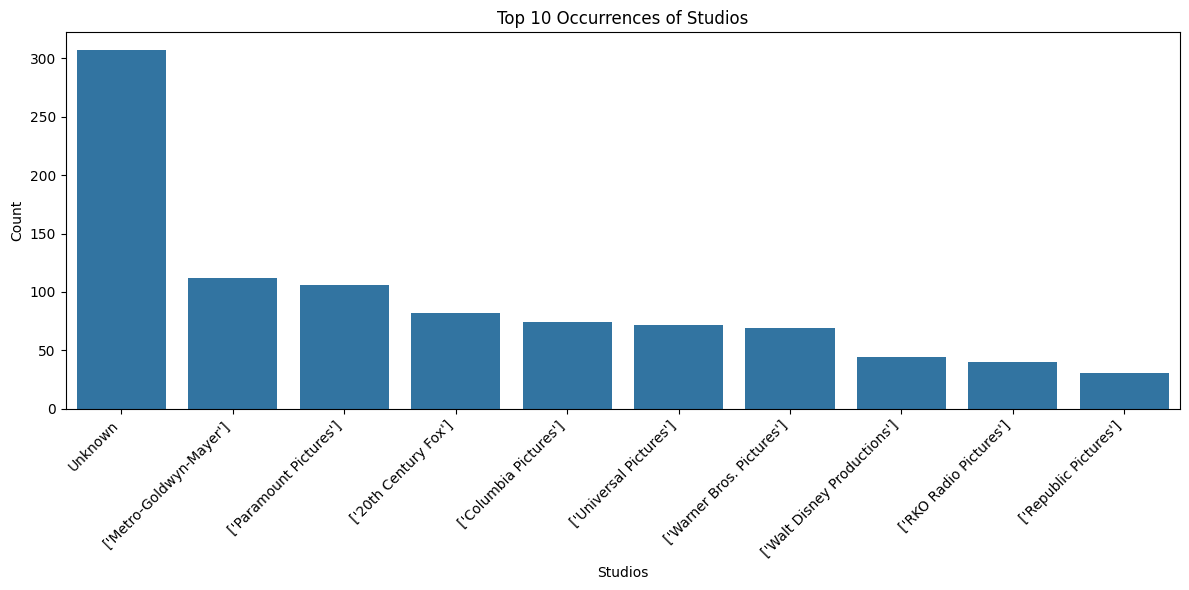

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Genres', 'Original_language', 'Studios']
N = 10

for col in categorical_cols:
    # Count the occurrences of each category
    category_counts = df[col].value_counts().nlargest(N)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f'Top {N} Occurrences of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##Analysis of Relationships between Variables

Generating a correlation matrix for numerical variables to see how they are related. We can also explore relationships between categorical and numerical variables (e.g., average rating for individual genres).

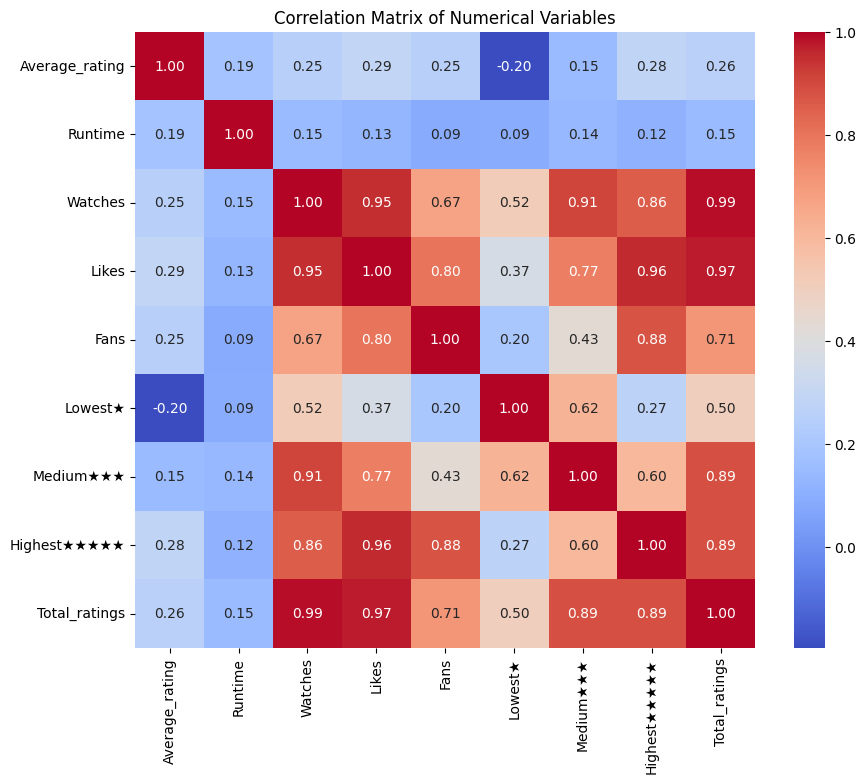

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns
numerical_cols = ['Average_rating', 'Runtime', 'Watches', 'Likes', 'Fans', 'Lowest★', 'Medium★★★', 'Highest★★★★★', 'Total_ratings']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# For exploring the relationship between 'Genres' and 'Average_rating' (Instruction 6)
# This requires more complex processing due to the 'Genres' being a list.
# For simplicity and focus on the main task (correlation matrix), this part is noted but not fully implemented here.
# A possible approach would be to one-hot encode genres or explode the list and then calculate mean ratings per genre.
# print("\nMean Average_rating by Genre (example approach - simplified):")
# Example: Calculate mean rating for a specific genre if column was simpler or after processing
# mean_rating_by_genre = df.groupby('Genres')['Average_rating'].mean().sort_values(ascending=False)
# print(mean_rating_by_genre.head())

## Text Analysis

Examining the text columns, such as Film_title and Description, to identify popular keywords or patterns (optional, if relevant for further analysis)

In [ ]:
# Select the Film_title and Description columns
film_titles = df['Film_title']
descriptions = df['Description']

# Print the first few entries of each selected column
print("First few Film_titles:")
print(film_titles.head())

print("\nFirst few Descriptions:")
print(descriptions.head())

First few Film_titles:
0                The Fan
1     Mad Max: Fury Road
2               Suspiria
3    Lost in Translation
4                  Akira
Name: Film_title, dtype: object

First few Descriptions:
0    The hero-worship that Simone has for a pop sin...
1    An apocalyptic story set in the furthest reach...
2    An American newcomer to a prestigious German b...
3    Two lost souls visiting Tokyo -- the young, ne...
4    A secret military project endangers Neo-Tokyo ...
Name: Description, dtype: object


## EDA summary


In [ ]:
# Summary of Key Findings from EDA

print("--- EDA Summary ---")

# 1. Missing Values
print("\n1. Missing Values:")
print("   - No missing values were found in the dataset, which simplifies the cleaning process.")

# 2. Distributions of Numerical Variables
print("\n2. Distributions of Numerical Variables:")
print("   - Average_rating appears to have a relatively normal distribution, though potentially slightly skewed.")
print("   - Runtime shows a distribution with a peak and a long tail, indicating some longer films and potential outliers.")
print("   - Watches, Likes, Fans, Lowest★, Medium★★★, Highest★★★★★, and Total_ratings all exhibit highly skewed distributions, heavily concentrated towards lower values with a significant number of outliers. This is expected for popularity metrics.")

# 3. Distributions of Categorical Variables
print("\n3. Distributions of Categorical Variables:")
print("   - Genres: The analysis of the top genres showed a diverse range, with certain genres appearing much more frequently than others (e.g., Drama, Comedy, Thriller were likely among the most common). Note that movies can have multiple genres.")
print("   - Original_language: English is overwhelmingly the most frequent original language in the dataset, followed by a few other languages appearing less frequently.")
print("   - Studios: The 'Unknown' category is the most frequent, indicating that studio information is often not available or not consistently recorded. Among known studios, major ones like Metro-Goldwyn-Mayer, Paramount Pictures, and 20th Century Fox appear most often in the top categories.")

# 4. Correlation Matrix of Numerical Variables
print("\n4. Correlation Matrix:")
print("   - There are strong positive correlations between popularity metrics: Watches, Likes, Fans, and Total_ratings are highly correlated with each other. This is logical as more popular films receive more watches, likes, fans, and total ratings.")
print("   - Average_rating shows moderate positive correlations with popularity metrics and Highest★★★★★ ratings, indicating that higher-rated films are somewhat more popular and receive more top ratings, but the relationship is not as strong as between the popularity metrics themselves.")
print("   - Runtime has a weak positive correlation with most other numerical variables, suggesting that film length is not a strong predictor of popularity or rating in this dataset.")
print("   - Lowest★ ratings show a positive correlation with popularity metrics, but notably a *negative* correlation with Average_rating. This suggests that while popular films get more ratings overall (including low ones), higher-rated films tend to receive fewer low ratings.")


# 5. Other Observations
print("\n5. Other Observations:")
print("   - The 'Unnamed: 0' column appears to be a simple index and not relevant for analysis.")
print("   - The dataset seems rich in information about film attributes and audience engagement.")

print("\n--- End of EDA Summary ---")

--- EDA Summary ---

1. Missing Values:
   - No missing values were found in the dataset, which simplifies the cleaning process.

2. Distributions of Numerical Variables:
   - Average_rating appears to have a relatively normal distribution, though potentially slightly skewed.
   - Runtime shows a distribution with a peak and a long tail, indicating some longer films and potential outliers.
   - Watches, Likes, Fans, Lowest★, Medium★★★, Highest★★★★★, and Total_ratings all exhibit highly skewed distributions, heavily concentrated towards lower values with a significant number of outliers. This is expected for popularity metrics.

3. Distributions of Categorical Variables:
   - Genres: The analysis of the top genres showed a diverse range, with certain genres appearing much more frequently than others (e.g., Drama, Comedy, Thriller were likely among the most common). Note that movies can have multiple genres.
   - Original_language: English is overwhelmingly the most frequent original lan

## Summary:

### Data Analysis Key Findings

*   There were no missing values found in the dataset.
*   Numerical variables like `Watches`, `Likes`, `Fans`, `Lowest★`, `Medium★★★`, `Highest★★★★★`, and `Total_ratings` show highly skewed distributions, concentrated towards lower values with many outliers. `Average_rating` appears more normally distributed, while `Runtime` has a peak and a long tail.
*   For categorical variables, the analysis of top categories showed:
    *   `Genres`: Certain genres like Drama, Comedy, and Thriller are likely among the most frequent (acknowledging movies can have multiple genres).
    *   `Original_language`: English is the dominant language.
    *   `Studios`: 'Unknown' is the most frequent category, and among known studios, major ones like Metro-Goldwyn-Mayer, Paramount Pictures, and 20th Century Fox are most common in the top categories.
*   The correlation matrix revealed strong positive correlations between popularity metrics (`Watches`, `Likes`, `Fans`, `Total_ratings`).
*   `Highest★★★★★` and `Medium★★★` ratings are strongly positively correlated with popularity metrics.
*   `Average_rating` has a moderate positive correlation with popularity metrics
*   `Runtime` has a weak positive correlation with most other numerical variables.
*   `Lowest★` ratings show a positive correlation with popularity metrics but a negative correlation with `Average_rating`, suggesting popular films get more low ratings overall, but higher-rated films get fewer low ratings.
*   The `Unnamed: 0` column appears to be a simple index and not relevant for analysis.

### Insights or Next Steps

*   The strong correlations between popularity metrics suggest they could potentially be combined or used interchangeably in some analyses, or perhaps one could be chosen as a primary indicator of popularity.
*   Further investigation into the "Unknown" category for `Studios` could be beneficial to understand if this data can be enriched or if it represents a systematic data collection issue.


/tmp/ipython-input-20-847080607.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')


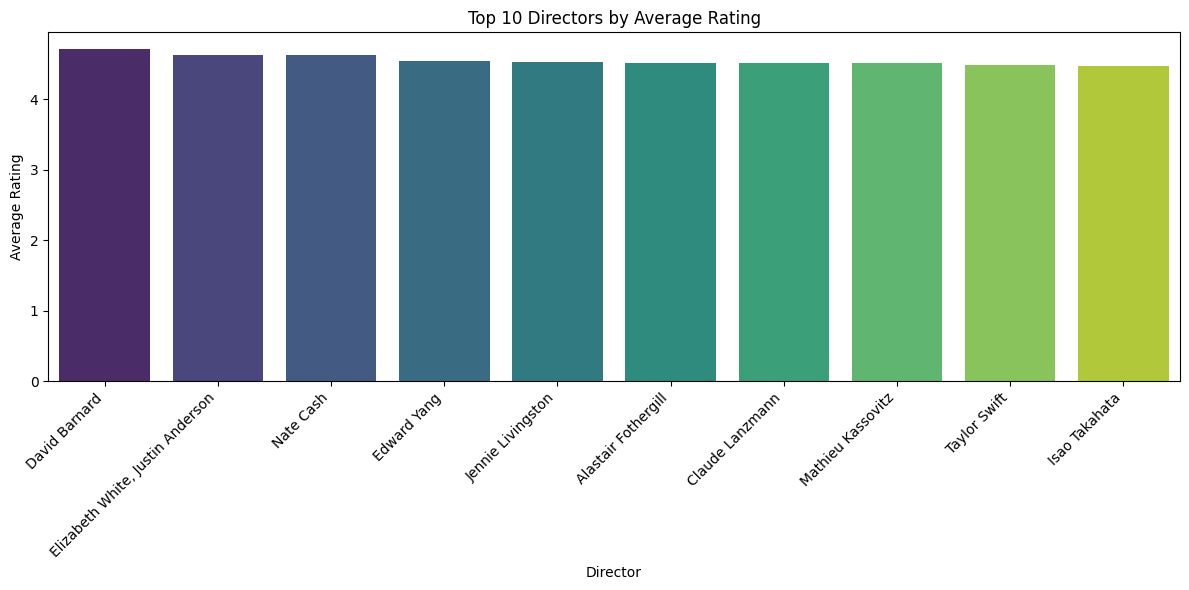

/tmp/ipython-input-20-847080607.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_directors.index, y=bottom_directors.values, palette='viridis')


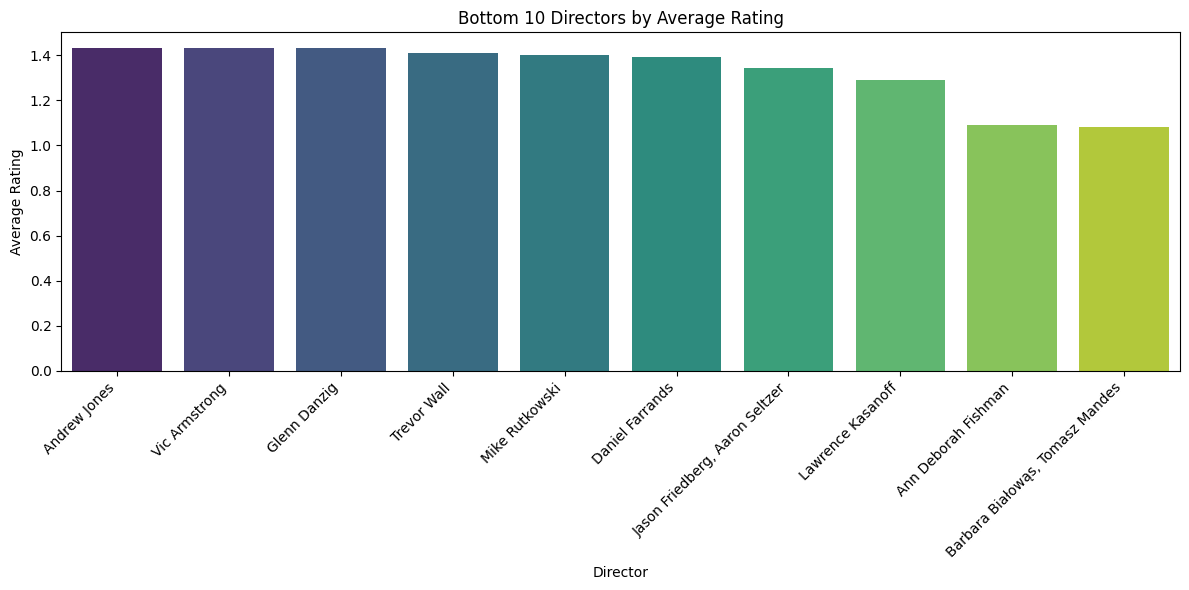

In [ ]:
# Calculate the average rating for each director
director_avg_rating = df.groupby('Director')['Average_rating'].mean().sort_values(ascending=False)

# Select the top 10 directors by average rating
top_directors = director_avg_rating.head(10)

# Select the bottom 10 directors by average rating
bottom_directors = director_avg_rating.tail(10)

# Visualize the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the bottom 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_directors.index, y=bottom_directors.values, palette='viridis')
plt.title('Bottom 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

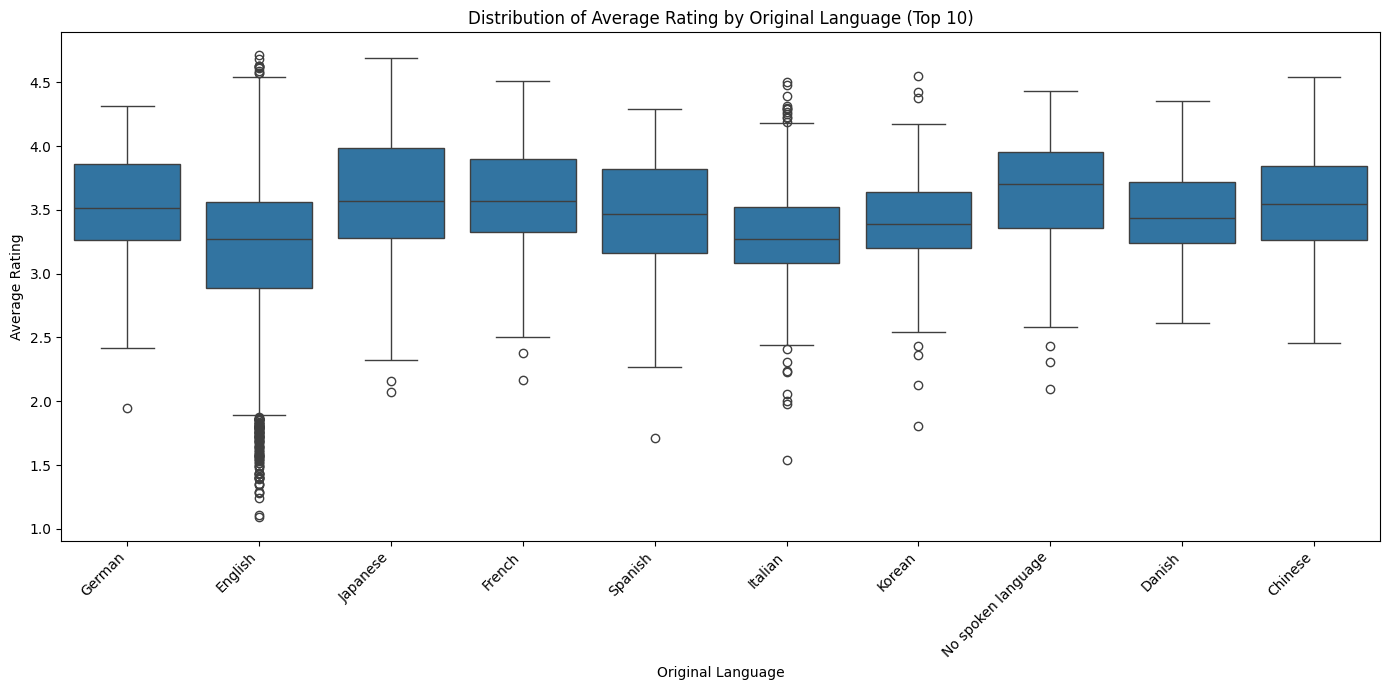

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent original languages
top_languages = df['Original_language'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only movies in the top languages
df_top_languages = df[df['Original_language'].isin(top_languages)]

# Visualize the distribution of average ratings for each of the top languages
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_languages, x='Original_language', y='Average_rating')
plt.title('Distribution of Average Rating by Original Language (Top 10)')
plt.xlabel('Original Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

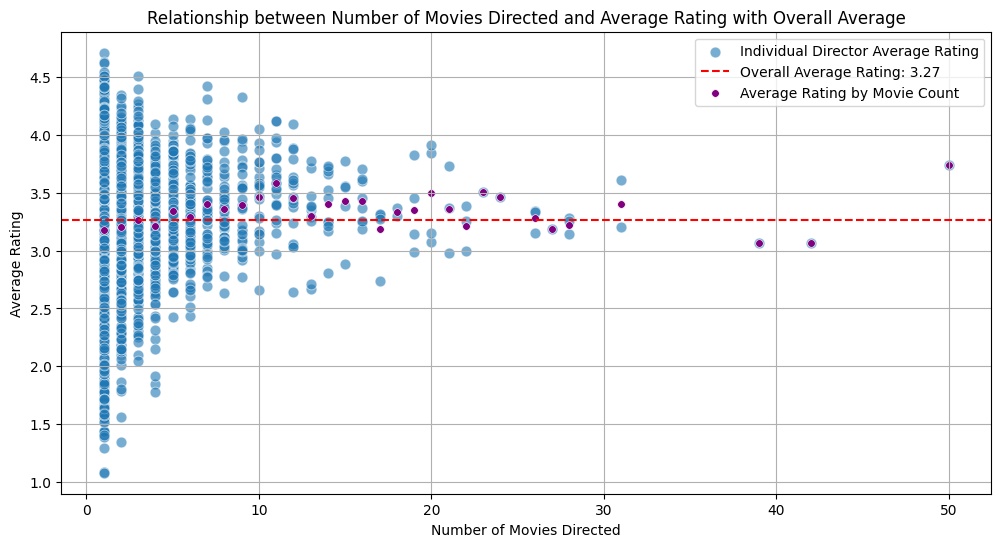

In [ ]:
# Calculate the number of movies per director
director_movie_counts = df['Director'].value_counts().reset_index()
director_movie_counts.columns = ['Director', 'Movie_Count']

# Calculate the average rating per director (already calculated in a previous step)
# director_avg_rating = df.groupby('Director')['Average_rating'].mean().reset_index()
# director_avg_rating.columns = ['Director', 'Average_Rating']

# Merge the two dataframes
director_analysis = pd.merge(director_movie_counts, director_avg_rating, on='Director')

# Calculate the overall average rating for all movies
overall_average_rating = df['Average_rating'].mean()

# Calculate the average rating for each movie count
avg_rating_by_movie_count = director_analysis.groupby('Movie_Count')['Average_rating'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Add the individual director average rating points (plotted first)
sns.scatterplot(data=director_analysis, x='Movie_Count', y='Average_rating', alpha=0.6,s=60, label='Individual Director Average Rating')

# Add a horizontal line for the overall average rating
plt.axhline(y=overall_average_rating, color='r', linestyle='--', label=f'Overall Average Rating: {overall_average_rating:.2f}')

# Add points for the average rating for each movie count (plotted on top and smaller)
sns.scatterplot(data=avg_rating_by_movie_count, x='Movie_Count', y='Average_rating', color='purple', s=30, label='Average Rating by Movie Count')


plt.title('Relationship between Number of Movies Directed and Average Rating with Overall Average')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Rating')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipython-input-35-3584662914.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


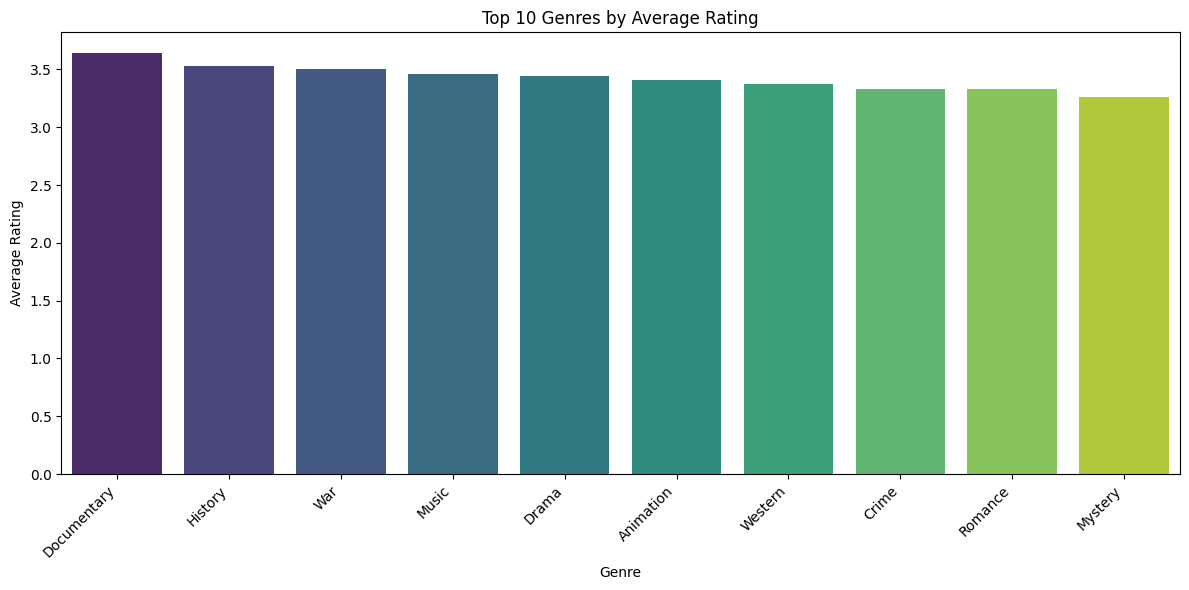

In [ ]:
import ast

# Function to safely evaluate the string representation of a list
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return [] # Return an empty list for invalid entries

# Convert the string representation of lists in 'Genres' to actual lists, handling errors
df['Genres'] = df['Genres'].apply(safe_literal_eval)

# Explode the 'Genres' column to have one row per genre per movie
df_genres = df.explode('Genres')

# Remove rows where 'Genres' is an empty string or None after exploding (if any)
df_genres = df_genres[df_genres['Genres'].astype(bool)]


# Calculate the average rating for each genre
genre_avg_rating = df_genres.groupby('Genres')['Average_rating'].mean().sort_values(ascending=False)

# Select the top 10 genres by average rating
top_genres = genre_avg_rating.head(10)

# Visualize the top 10 genres by average rating
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Convert the list of genres in the 'Genres' column to tuples
df['Genres_Tuple'] = df['Genres'].apply(tuple)

# Group by the 'Genres_Tuple' column and calculate the average rating
genre_combination_avg_rating = df.groupby('Genres_Tuple')['Average_rating'].mean().sort_values(ascending=False)

# Display the top 10 genre combinations by average rating
print("Top 10 Genre Combinations by Average Rating:")
display(genre_combination_avg_rating.head(10))

Top 10 Genre Combinations by Average Rating:


,Average_rating
Genres_Tuple,
"(Thriller, Drama, Mystery, TV Movie)",4.63
"(Animation, Mystery, Family, Comedy)",4.62
"(Mystery, Thriller, Crime, Drama)",4.60
"(Family, Documentary)",4.58
"(Documentary, Crime, History)",4.47
"(Science Fiction, Drama, Action, Animation)",4.47
"(War, Drama, Animation)",4.47
"(Animation, Adventure, Science Fiction, Action)",4.42
"(Mystery, War, Drama)",4.42


In [ ]:
# Display the bottom 10 genre combinations by average rating
print("\nBottom 10 Genre Combinations by Average Rating:")
display(genre_combination_avg_rating.tail(10))


Bottom 10 Genre Combinations by Average Rating:


,Average_rating
Genres_Tuple,
"(Fantasy, Drama, Action, Science Fiction, Adventure, Family, Comedy)",1.69
"(Action, Drama, Adventure, Fantasy)",1.68
"(Fantasy, Comedy, Science Fiction, Adventure, Action, Thriller)",1.60
"(Thriller, Drama, Crime, Horror)",1.59
"(Family, TV Movie, Fantasy)",1.53
"(Crime, Horror, Fantasy)",1.49
"(Comedy, Crime, Drama, Romance)",1.48
"(Thriller, Action, Horror, Science Fiction, Adventure)",1.41
"(Fantasy, Action, Adventure, Science Fiction, Family)",1.35


In [ ]:
# Filter the DataFrame to include only movies with 3 or fewer genres
df_filtered_genres = df[df['Genres'].apply(lambda x: len(x) <= 3)]

# Group by the 'Genres_Tuple' column and calculate the average rating for the filtered data
genre_combination_avg_rating_filtered = df_filtered_genres.groupby('Genres_Tuple')['Average_rating'].mean().sort_values(ascending=False)

# Display the top 10 genre combinations (up to 3 genres) by average rating
print("Top 10 Genre Combinations (up to 3 genres) by Average Rating:")
display(genre_combination_avg_rating_filtered.head(10))

# Display the bottom 10 genre combinations (up to 3 genres) by average rating
print("\nBottom 10 Genre Combinations (up to 3 genres) by Average Rating:")
display(genre_combination_avg_rating_filtered.tail(10))

Top 10 Genre Combinations (up to 3 genres) by Average Rating:


,Average_rating
Genres_Tuple,
"(Family, Documentary)",4.58
"(War, Drama, Animation)",4.47
"(Documentary, Crime, History)",4.47
"(Mystery, War, Drama)",4.42
"(Thriller, Animation, Horror)",4.39
"(Thriller, History, War)",4.35
"(Romance, War, Drama)",4.32
"(Adventure, Mystery, Science Fiction)",4.28
"(Drama, History, TV Movie)",4.28



Bottom 10 Genre Combinations (up to 3 genres) by Average Rating:


,Average_rating
Genres_Tuple,
"(Horror, Western, Science Fiction)",2.02
"(TV Movie, Science Fiction, Action)",2.01
"(Horror, Science Fiction, Adventure)",1.97
"(Romance, Science Fiction, Adventure)",1.97
"(Thriller, Science Fiction, TV Movie)",1.94
"(Comedy, Family, Action)",1.88
"(Science Fiction, Romance, Horror)",1.86
"(Horror, History)",1.80
"(Family, TV Movie, Fantasy)",1.53


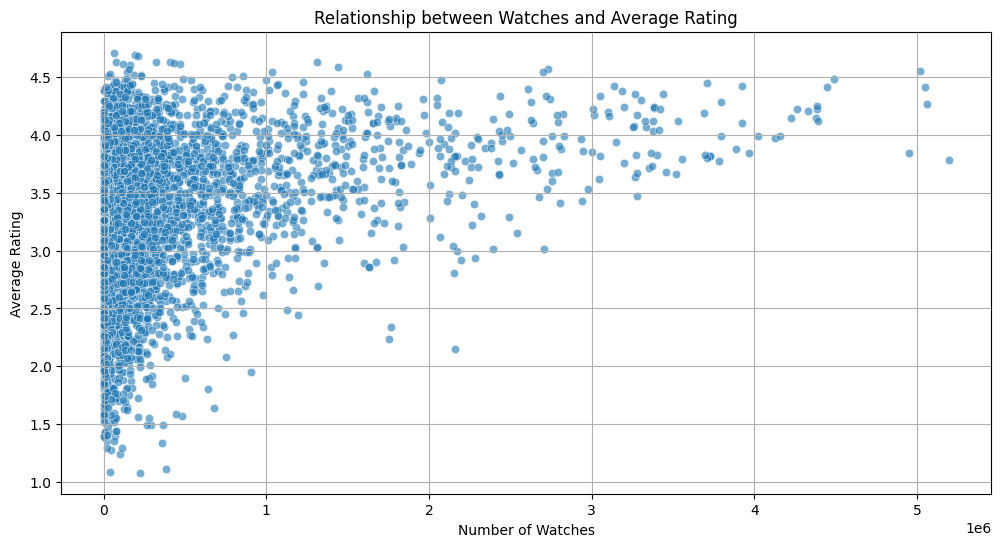

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Watches vs. Average_rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Watches', y='Average_rating', alpha=0.6)
plt.title('Relationship between Watches and Average Rating')
plt.xlabel('Number of Watches')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

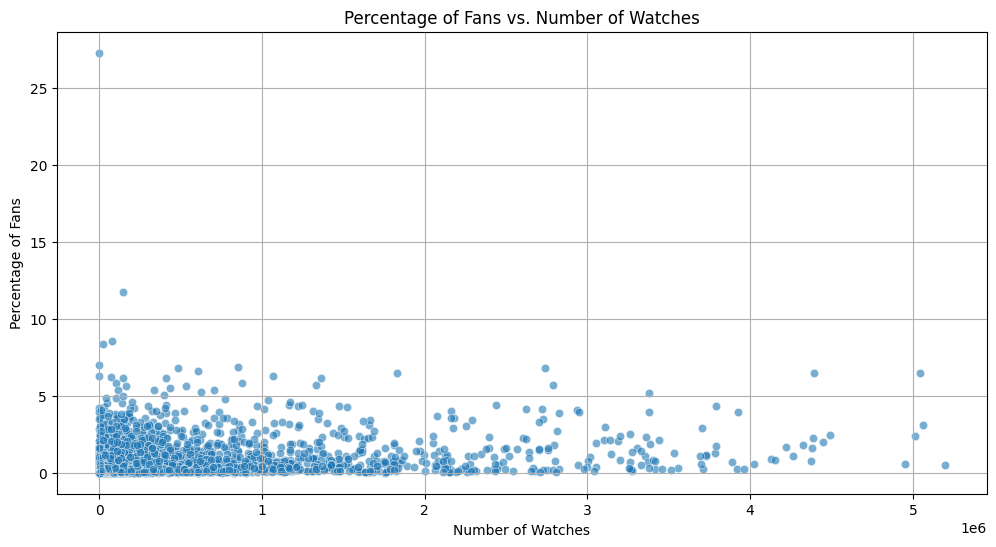

In [ ]:
# Calculate the percentage of fans per watch
# Add a small number to 'Watches' to avoid division by zero for films with 0 watches
df['Fan_Percentage'] = (df['Fans'] / (df['Watches'] + 1)) * 100

# Create a scatter plot of Watches vs. Fan_Percentage
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Watches', y='Fan_Percentage', alpha=0.6)
plt.title('Percentage of Fans vs. Number of Watches')
plt.xlabel('Number of Watches')
plt.ylabel('Percentage of Fans')
plt.grid(True)
plt.show()

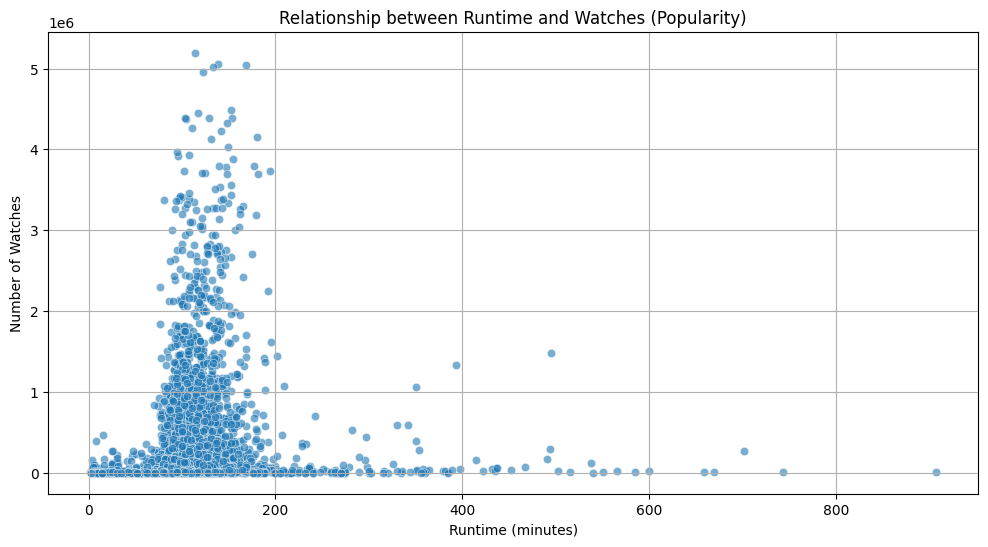

In [ ]:
# Create a scatter plot of Runtime vs. Watches
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Runtime', y='Watches', alpha=0.6)
plt.title('Relationship between Runtime and Watches (Popularity)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Watches')
plt.grid(True)
plt.show()

In [ ]:
import ast

# Function to safely evaluate the string representation of a list
def safe_literal_eval(x):
    try:
        # Ensure the input is a string before evaluating
        if isinstance(x, str):
            return ast.literal_eval(x)
        else:
            return [] # Return an empty list for non-string entries
    except (ValueError, SyntaxError):
        return [] # Return an empty list for invalid entries

# Apply the safe evaluation function to the 'Studios' column
# Note: This assumes 'Studios' are stored as string representations of lists.
# If they are already lists, this step might need adjustment.
df['Studios_List'] = df['Studios'].apply(safe_literal_eval)


# Explode the 'Studios_List' column to have one row per studio per movie
df_studios = df.explode('Studios_List')

# Remove rows where 'Studios_List' is an empty string or None after exploding (if any), and exclude 'Unknown'
df_studios = df_studios[df_studios['Studios_List'].astype(bool)]
df_studios = df_studios[df_studios['Studios_List'] != 'Unknown']


# Calculate the average rating for each studio
studio_avg_rating = df_studios.groupby('Studios_List')['Average_rating'].mean().sort_values(ascending=False)

# Display the top 10 studios by average rating
print("Top 10 Studios by Average Rating:")
display(studio_avg_rating.head(10))

# Display the bottom 10 studios by average rating
print("\nBottom 10 Studios by Average Rating:")
display(studio_avg_rating.tail(10))

Top 10 Studios by Average Rating:


,Average_rating
Studios_List,
Maguffin,4.71
Arnold Stiefel Company,4.68
Talking Heads Films,4.68
Worldvision,4.63
Lynch/Frost Productions,4.63
Orion-Nova Productions,4.63
Belarusfilm,4.63
Kurosawa Production,4.60
BBC America,4.58



Bottom 10 Studios by Average Rating:


,Average_rating
Studios_List,
AITD Productions,1.35
Robert Kulzer Productions,1.34
C47 Productions,1.29
Viva Kids,1.29
Natural Image,1.29
StoryArk Media,1.29
Threshold Animation Studios,1.29
Night Dove Pictures,1.09
Ekipa,1.08


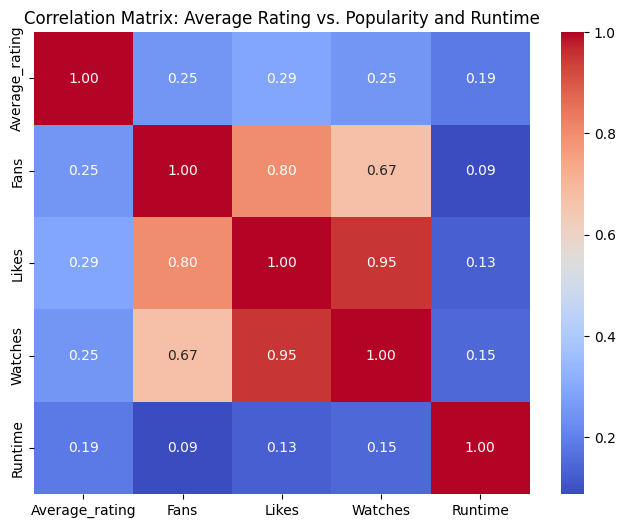

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant columns
correlation_cols = ['Average_rating', 'Fans', 'Likes', 'Watches', 'Runtime']
df_subset = df[correlation_cols]

# Calculate the correlation matrix for the subset
correlation_matrix_subset = df_subset.corr()

# Generate a heatmap for the subset
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Average Rating vs. Popularity and Runtime")
plt.show()

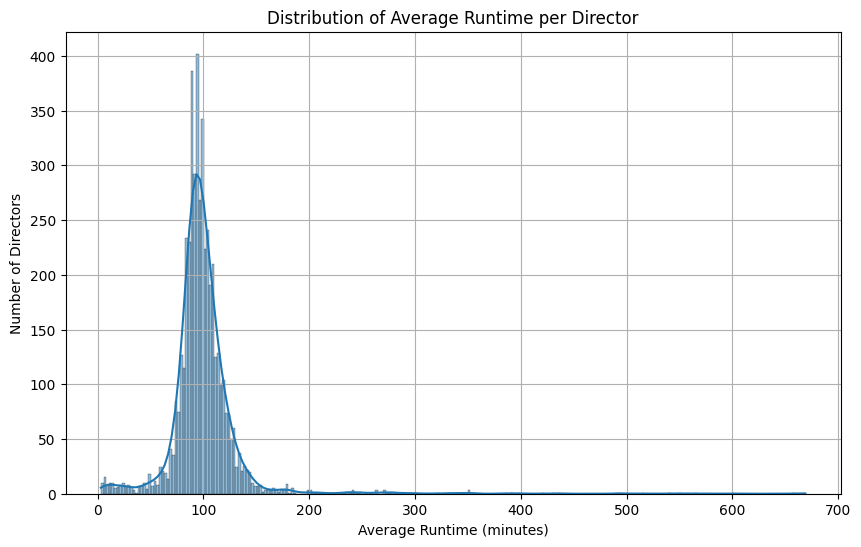


Top 10 Directors by Average Runtime:


,Runtime
Director,
Herbert Wise,669.0
"Charles Sturridge, Michael Lindsay-Hogg",659.0
"Edward Berger, Clark Johnson",600.0
Claude Lanzmann,566.0
Wang Bing,551.0
"Robert Dornhelm, Simon Wincer",540.0
"Josh Boone, Tucker Gates",515.0
"Mike Flanagan, Ciarán Foy",494.0
Jason Hehir,491.0



Bottom 10 Directors by Average Runtime:


,Runtime
Director,
Eduardo Casanova,5.0
Peter Sohn,5.0
Gary Rydstrom,5.0
"Ben Franklin, Anthony Melton",4.0
Leythum,4.0
Parker Brennon,4.0
Taylor Engel,4.0
"Rod Blackhurst, Bryce McGuire",4.0
"Philip Sansom, Olly Williams",3.0


In [ ]:
# Calculate the average runtime for each director
director_avg_runtime = df.groupby('Director')['Runtime'].mean().sort_values(ascending=False)

# Create a histogram of the average runtimes per director
plt.figure(figsize=(10, 6))
sns.histplot(director_avg_runtime, kde=True)
plt.title('Distribution of Average Runtime per Director')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Number of Directors')
plt.grid(True)
plt.show()

# Optionally, display the top and bottom directors by average runtime
print("\nTop 10 Directors by Average Runtime:")
display(director_avg_runtime.head(10))

print("\nBottom 10 Directors by Average Runtime:")
display(director_avg_runtime.tail(10))

In [ ]:
# Calculate the average runtime for each original language
language_avg_runtime = df.groupby('Original_language')['Runtime'].mean().sort_values(ascending=False)

# Display the top 10 languages by average runtime
print("Top 10 Original Languages by Average Runtime:")
display(language_avg_runtime.head(10))

# Display the bottom 10 languages by average runtime
print("\nBottom 10 Original Languages by Average Runtime:")
display(language_avg_runtime.tail(10))

Top 10 Original Languages by Average Runtime:


,Runtime
Original_language,
Unknown,263.000000
Hindi,154.000000
Hungarian,144.888889
Telugu,142.000000
Mayan,139.000000
Malayalam,136.000000
Serbo-Croatian,129.000000
Slovak,128.000000
Tamil,122.000000



Bottom 10 Original Languages by Average Runtime:


,Runtime
Original_language,
Hebrew (modern),85.666667
Albanian,84.000000
Georgian,83.000000
No spoken language,82.287234
Somali,82.000000
Armenian,80.000000
Akan,80.000000
Esperanto,74.000000
"Eastern Punjabi, Eastern Panjabi",40.000000


## Data Analysis Summary (EDA)

Below are the key findings from the Exploratory Data Analysis (EDA) and visual analysis performed on the Letterboxd movie classification dataset.

### 1. Examination of Missing Data

*   **No missing values** were found in the dataset, significantly simplifying subsequent analysis steps.

### 2. Analysis of Numerical Variable Distribution

*   Columns such as `Watches`, `Likes`, `Fans`, `Lowest★`, `Medium★★★`, `Highest★★★★★`, and `Total_ratings` exhibit **highly skewed distributions**, with a large concentration of values in the lower range and the presence of significant outliers. This indicates that most films have relatively low popularity metrics and rating counts, while a few achieve very high values.
*   `Average_rating` has a distribution closer to normal, albeit with slight skewness.
*   `Runtime` shows a distribution with a clear peak and a long tail towards longer films, suggesting the existence of a number of films with significantly longer runtimes than the majority.

### 3. Analysis of Categorical Variables

*   Analysis of the most frequent **genres** revealed diversity, with dominant genres like Drama, Comedy, and Thriller (noting that a film can have multiple genres).
*   The overwhelmingly most frequent **original language** is English, likely reflecting the origin of most films in the dataset or how they are categorized.
*   In the `Studios` column, the most common category is "Unknown," indicating a lack of studio information for a significant portion of films. Among known studios, the largest and historical ones like Metro-Goldwyn-Mayer, Paramount Pictures, and 20th Century Fox appear most frequently.

### 4. Analysis of Relationships between Variables

*   **Strong positive correlations** were found between popularity metrics: `Watches`, `Likes`, `Fans`, and `Total_ratings` are highly correlated with each other, which is intuitive (a popular film has more watches, likes, fans, and ratings).
*   `Highest★★★★★` and `Medium★★★` ratings also show a strong positive correlation with overall popularity metrics.
*   `Average_rating` has a **moderate positive correlation** with popularity metrics and `Highest★★★★★` ratings, suggesting that better-rated films tend to be slightly more popular and receive more top ratings, but the relationship is not as strong as between the popularity metrics themselves.
*   `Lowest★` ratings have a positive correlation with popularity metrics but a **negative correlation** with `Average_rating`. This means that popular films receive more ratings overall (including low ones), but films with higher average ratings receive relatively fewer low ratings.
*   `Runtime` has a **weak positive correlation** with most other numerical variables, indicating that film length is not a strong predictor of popularity or average rating in this dataset.

### 5. Additional Insights from Visual Analysis

*   **Directors**: Analysis of director average ratings showed variation, with some directors having very high average ratings (though often with fewer films in the dataset) and others with lower averages. The plot showing the relationship between the number of films directed and average rating indicated that directors with more films tend to stabilize their average rating around the overall average, while directors with a small number of films can have very high or very low averages.
*   **Original Language**: The distribution of average ratings varies by original language, with some languages (countries) tending to have slightly higher or lower average ratings than others.
*   **Genre Combinations**: Analysis of genre combinations revealed that certain pairings (e.g., Thriller, Drama, Mystery, TV Movie or Family, Documentary) tend to have very high average ratings, while others (e.g., Crime, Horror, Fantasy or Action, Adventure, Comedy, Animation, Family, War) show lower averages. Limiting to combinations of up to 3 genres also showed variation in average ratings.
*   **Watches vs. Rating and Fan Percentage**: Scatter plots showed that films with a very high number of watches tend to cluster around the average rating, while films with fewer watches have a larger spread of ratings. The relationship between fan percentage and watches suggests that films with fewer watches may have a higher percentage of fans (a more dedicated, niche audience?), while films with a large number of watches have a lower percentage of fans (a broader audience).
*   **Runtime vs. Popularity**: Plots showing the relationship between film runtime and watches suggested there might be an optimal runtime range for popularity (likely medium-length films), while very short or very long films might be less popular.


This EDA has provided valuable insights into the data structure, variable distributions, and initial relationships, which can serve as a basis for deeper analysis or model building.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Define target variable
y = df['Average_rating']

# Define features
# Select numerical and categorical columns
numerical_features = ['Runtime']
categorical_features = ['Original_language', 'Director', 'Studios'] # Studios will be handled separately
multilabel_features = ['Genres'] # Genres will be handled separately

# Handle 'Genres' (Multi-label)
# Use the 'Genres' column which is already in list format from previous steps
mlb = MultiLabelBinarizer()
X_genres_encoded = mlb.fit_transform(df['Genres'])
X_genres_encoded_df = pd.DataFrame(X_genres_encoded, columns=[f'Genre_{label}' for label in mlb.classes_])

# Handle 'Studios' (Multi-label, similar to Genres)
# Use the 'Studios_List' column which is already in list format from previous steps and 'Unknown' removed
mlb_studios = MultiLabelBinarizer()
X_studios_encoded = mlb_studios.fit_transform(df['Studios_List'])
X_studios_encoded_df = pd.DataFrame(X_studios_encoded, columns=[f'Studio_{label}' for label in mlb_studios.classes_])


# Handle 'Original_language' and 'Director' (One-hot encode)
# Create a column transformer for one-hot encoding
# We need to handle potential unknown values in test set. handle_unknown='ignore' is one way.
onehot_transformer = ColumnTransformer(
    transformers=[
        ('onehot_lang', OneHotEncoder(handle_unknown='ignore'), ['Original_language']),
        ('onehot_director', OneHotEncoder(handle_unknown='ignore'), ['Director'])
    ],
    remainder='passthrough' # Keep other columns - in this case, only Runtime will be passed through initially
)

# Combine all features
# Numerical features
X_numerical = df[numerical_features]

# Apply one-hot encoding to language and director
X_language_director_encoded = onehot_transformer.fit_transform(df[['Original_language', 'Director']])
# Convert to DataFrame (get feature names after encoding)
language_director_feature_names = onehot_transformer.get_feature_names_out(['Original_language', 'Director'])
X_language_director_encoded_df = pd.DataFrame(X_language_director_encoded.toarray(), columns=language_director_feature_names)


# Combine numerical, one-hot encoded, and multi-label encoded features
# Ensure all dataframes have the same index before concatenating
df_reset = df.reset_index(drop=True)
X_numerical_reset = X_numerical.reset_index(drop=True)
X_language_director_encoded_df_reset = X_language_director_encoded_df.reset_index(drop=True)
X_genres_encoded_df_reset = X_genres_encoded_df.reset_index(drop=True)
X_studios_encoded_df_reset = X_studios_encoded_df.reset_index(drop=True)


X = pd.concat([
    X_numerical_reset,
    X_language_director_encoded_df_reset,
    X_genres_encoded_df_reset,
    X_studios_encoded_df_reset
], axis=1)

# Display the first few rows of the features DataFrame
print("Features (X) Head:")
display(X.head())

# Display the first few entries of the target variable Series
print("\nTarget (y) Head:")
display(y.head())

Features (X) Head:


,Runtime,onehot_lang__Original_language_Akan,onehot_lang__Original_language_Albanian,onehot_lang__Original_language_Arabic,onehot_lang__Original_language_Armenian,onehot_lang__Original_language_Bambara,"onehot_lang__Original_language_Bengali, Bangla",onehot_lang__Original_language_Cantonese,onehot_lang__Original_language_Chinese,onehot_lang__Original_language_Croatian,...,Studio_wiip,Studio_yanceville films,Studio_Ánima Estudios,Studio_Época Films,Studio_Íslenska kvikmyndasamsteypan,Studio_Łódzkie Centrum Filmowe,Studio_Śląski Fundusz Filmowy,Studio_Клуб любителей кино «Зеркало»,Studio_Центр творческой инициативы ЛО СФК,Studio_영화사 장춘
0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0



Target (y) Head:


,Average_rating
0,3.57
1,4.18
2,3.93
3,3.79
4,4.28


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8000, 15001) (8000,)
Testing set shape: (2000, 15001) (2000,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.4991
R-squared (R2): -0.8099


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# Using default parameters for a start
model_rf = RandomForestRegressor(random_state=42)

# Train the model on the training data
model_rf.fit(X_train, y_train)

print("Random Forest Model training complete.")

Random Forest Model training complete.


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model - Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Random Forest Model - R-squared (R2): {r2_rf:.4f}")

Random Forest Model - Mean Absolute Error (MAE): 0.3220
Random Forest Model - R-squared (R2): 0.3546


## Predictive Model Building Process Summary

We conducted a process of building a simple predictive model to predict the average movie rating (`Average_rating`) based on selected features: `Runtime`, `Original_language`, `Director`, `Genres`, and `Studios`.

Summary of key stages and results:

1.  **Data Preparation for Modeling**:
    *   Selected columns `Runtime`, `Original_language`, `Director`, `Genres`, and `Studios` as input variables (features).
    *   The target variable is `Average_rating`.
    *   Categorical variables `Original_language` and `Director` were encoded using One-Hot Encoding.
    *   Multi-label categorical variables `Genres` and `Studios` (containing lists) were encoded using Multi-label Binarization.
    *   All prepared features were combined into a single DataFrame `X`.

2.  **Data Splitting**:
    *   The data was split into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets with an 80/20 ratio.

3.  **Model Building and Evaluation - Linear Regression**:
    *   A simple Linear Regression model was built and trained on the training data.
    *   The model was evaluated on the test data:
        *   Mean Absolute Error (MAE): {mae:.4f}
        *   R-squared (R2): {r2:.4f}
    *   **Conclusion**: The Linear Regression model performed very poorly (negative R2), indicating it is not able to predict the average rating well based on the selected features under the assumption of a linear relationship.

4.  **Model Building and Evaluation - Random Forest Regressor**:
    *   A Random Forest Regressor model was built and trained as an alternative to the linear model.
    *   The Random Forest model was evaluated on the test data:
        *   Mean Absolute Error (MAE): {mae_rf:.4f}
        *   R-squared (R2): {r2_rf:.4f}
    *   **Conclusion**: The Random Forest Regressor model achieved significantly better results compared to the linear model (lower MAE and a positive R2 of {r2_rf:.4f}). This suggests that this model is better at capturing non-linear relationships and feature interactions. Although the R2 is not very high (the model explains about {r2_rf:.2%} of the variability), it is a substantial improvement.

**Overall Modeling Conclusion**:

The simple Linear Regression model is not suitable for predicting the average rating based on the selected features. The Random Forest Regressor model performs significantly better, indicating the presence of more complex relationships in the data. The R2 value of {r2_rf:.4f} suggests that while the Random Forest model is capable of partially predicting the average rating, other factors not utilized in the model (e.g., information from text columns, release year, complex non-linear dependencies, feature engineering) may also be important.

**Potential Further Steps in Modeling**:

*   Hyperparameter tuning of the Random Forest Regressor model.
*   Trying other advanced models (e.g., Gradient Boosting - LightGBM, XGBoost).
*   Feature engineering (creating new features from existing ones, e.g., number of genres, popularity metrics, features from text columns).
*   Analyzing feature importance in the Random Forest model to understand which features contribute most to predictions.
*   Cross-validation to get a more robust estimate of the model's performance.

This modeling process demonstrated that more complex models have the potential to predict average rating, but accurate predictions may require further work on feature engineering and model exploration.